In [1]:
# Importing libraries

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

## Load DataSet

In [2]:
df = pd.read_csv('data_car.csv')

In [3]:
df.head()

,Make,Model,Year,Engine_Fuel_Type,Engine_HP,Engine_Cylinders,Transmission_Type,Driven_Wheels,Number_of_Doors,Market_Category,Vehicle_Size,Vehicle_Style,highway_MPG,city_mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
df.tail()

,Make,Model,Year,Engine_Fuel_Type,Engine_HP,Engine_Cylinders,Transmission_Type,Driven_Wheels,Number_of_Doors,Market_Category,Vehicle_Size,Vehicle_Style,highway_MPG,city_mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


# Exploratory Data Analysis

In [5]:
df.size

190624

In [6]:
df.shape

(11914, 16)

In [7]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine_Fuel_Type', 'Engine_HP',
       'Engine_Cylinders', 'Transmission_Type', 'Driven_Wheels',
       'Number_of_Doors', 'Market_Category', 'Vehicle_Size', 'Vehicle_Style',
       'highway_MPG', 'city_mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [8]:
df.describe()

,Year,Engine_HP,Engine_Cylinders,Number_of_Doors,highway_MPG,city_mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [9]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine_Fuel_Type      object
Engine_HP            float64
Engine_Cylinders     float64
Transmission_Type     object
Driven_Wheels         object
Number_of_Doors      float64
Market_Category       object
Vehicle_Size          object
Vehicle_Style         object
highway_MPG            int64
city_mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

There are 16 columns in which 8 columns are categorical and 8 columns are numerical columns

In [10]:
df.nunique()

Make                   48
Model                 915
Year                   28
Engine_Fuel_Type       10
Engine_HP             356
Engine_Cylinders        9
Transmission_Type       5
Driven_Wheels           4
Number_of_Doors         3
Market_Category        71
Vehicle_Size            3
Vehicle_Style          16
highway_MPG            59
city_mpg               69
Popularity             48
MSRP                 6049
dtype: int64

In [11]:
df['Make'].unique()

array(['BMW', 'Audi', 'FIAT', 'Mercedes-Benz', 'Chrysler', 'Nissan',
       'Volvo', 'Mazda', 'Mitsubishi', 'Ferrari', 'Alfa Romeo', 'Toyota',
       'McLaren', 'Maybach', 'Pontiac', 'Porsche', 'Saab', 'GMC',
       'Hyundai', 'Plymouth', 'Honda', 'Oldsmobile', 'Suzuki', 'Ford',
       'Cadillac', 'Kia', 'Bentley', 'Chevrolet', 'Dodge', 'Lamborghini',
       'Lincoln', 'Subaru', 'Volkswagen', 'Spyker', 'Buick', 'Acura',
       'Rolls-Royce', 'Maserati', 'Lexus', 'Aston Martin', 'Land Rover',
       'Lotus', 'Infiniti', 'Scion', 'Genesis', 'HUMMER', 'Tesla',
       'Bugatti'], dtype=object)

In [12]:
df['Year'].unique()

array([2011, 2012, 2013, 1992, 1993, 1994, 2017, 1991, 2016, 1990, 2015,
       1996, 1997, 1998, 2014, 1999, 2002, 2003, 2004, 1995, 2007, 2008,
       2009, 2001, 2010, 2000, 2005, 2006], dtype=int64)

<AxesSubplot: >

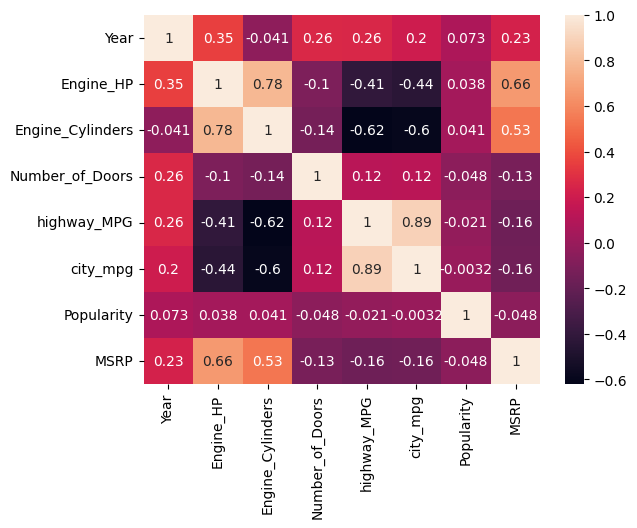

In [13]:
corr_matrix=df.corr()
sns.heatmap(df.corr(),annot=True)


In [14]:
corr_matrix[corr_matrix.abs() > .65].dropna(axis=1, how='all').replace(1., np.nan).dropna(how='all', axis=1).dropna(how='all', axis=0).apply(lambda x:x.dropna().to_dict() ,axis=1).to_dict()

{'Engine_HP': {'Engine_Cylinders': 0.7799879704685259,
  'MSRP': 0.6620076606110145},
 'Engine_Cylinders': {'Engine_HP': 0.7799879704685259},
 'highway_MPG': {'city_mpg': 0.8868294962591425},
 'city_mpg': {'highway_MPG': 0.8868294962591425},
 'MSRP': {'Engine_HP': 0.6620076606110145}}

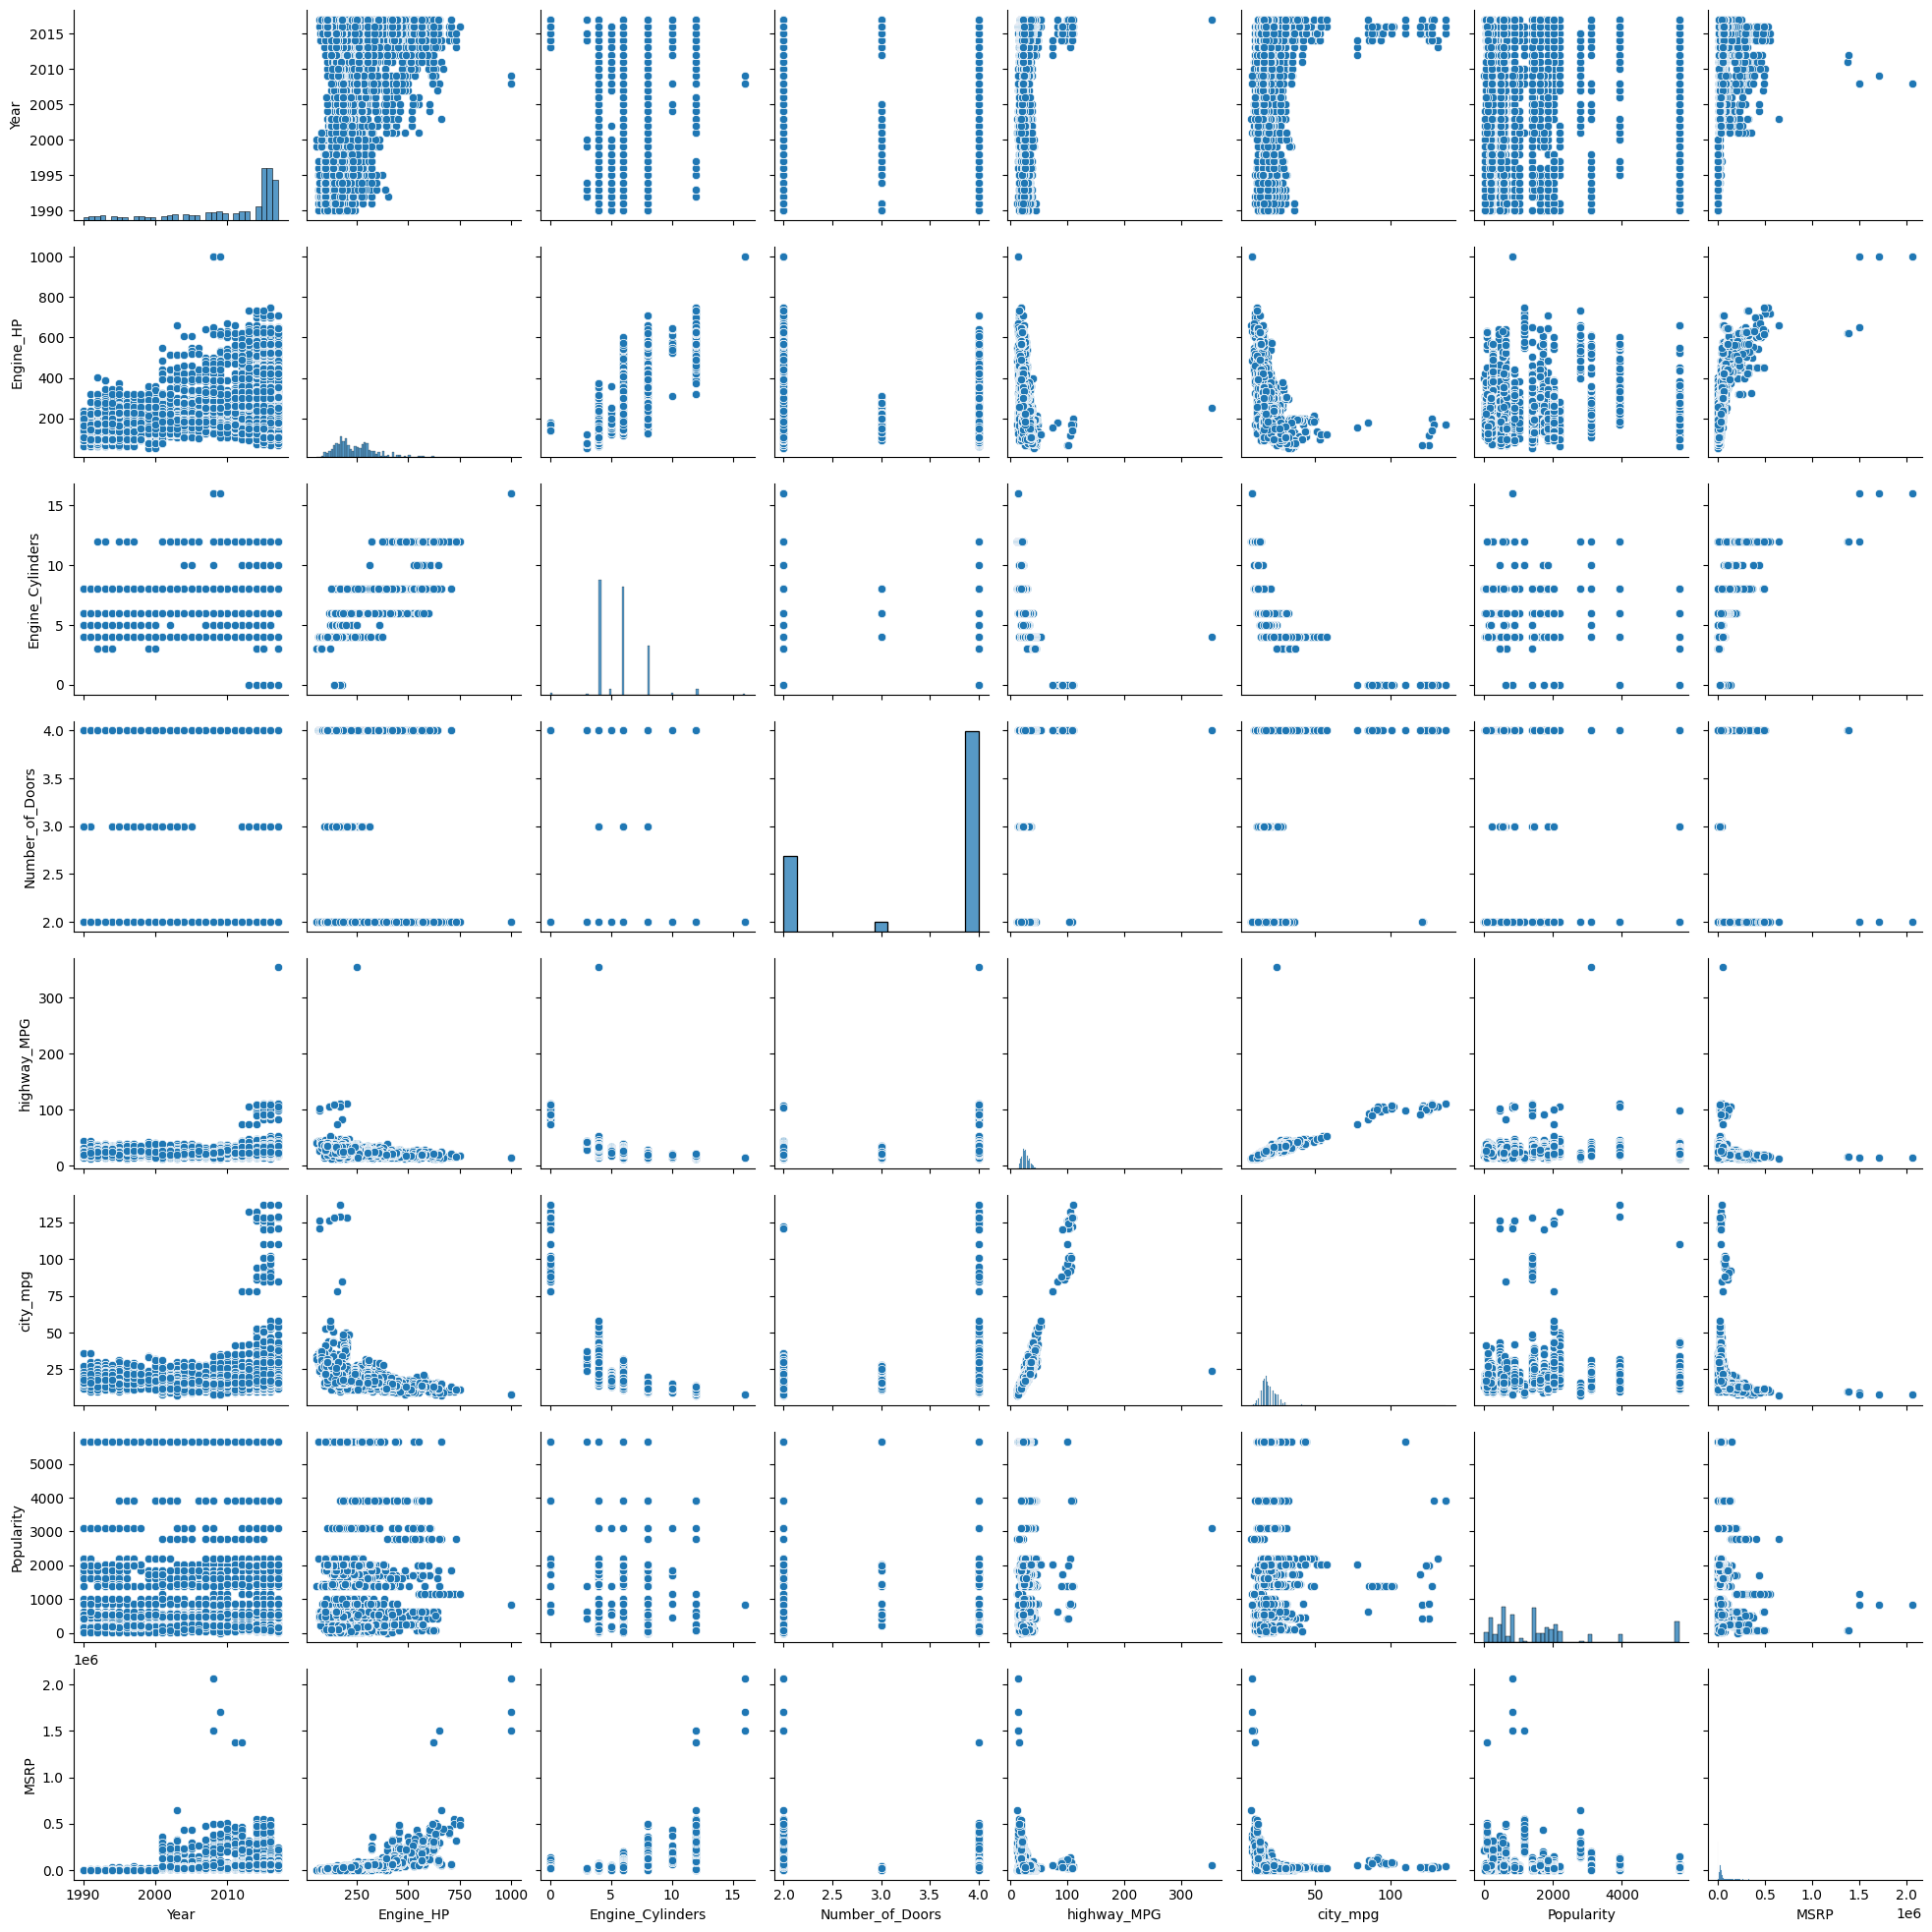

In [15]:
sns.pairplot(df)

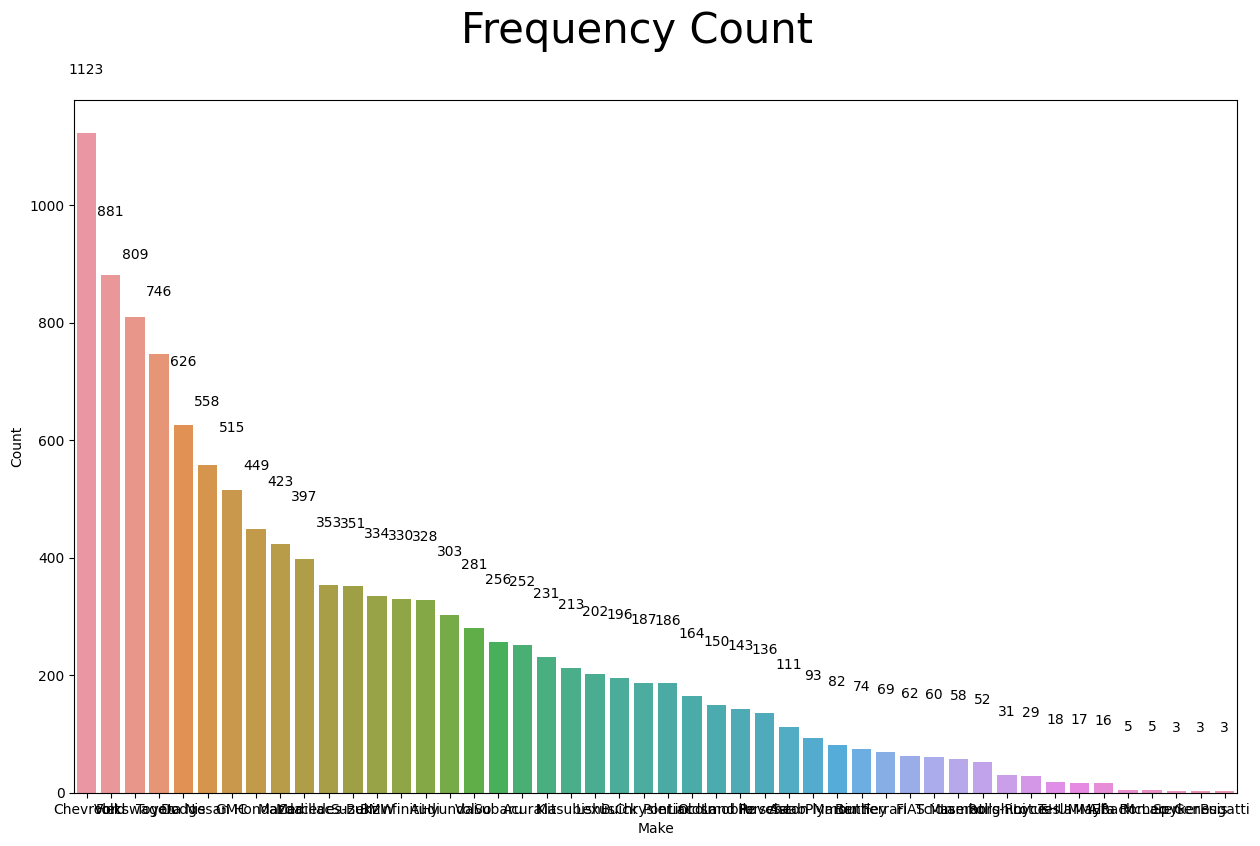

In [16]:
fig, axs = plt.subplots(1,1, figsize=(15,9))
fig.suptitle('Frequency Count', size=30)

temp_df = df['Make'].value_counts().to_frame().reset_index()
g = sns.barplot(x='index', y='Make', data=temp_df, orient='v', ax=axs)

for index, row in temp_df.iterrows():
    g.text(row.name,row.Make+ 100, row.Make, color='black', ha="center")

axs.set_xlabel('Make')
axs.set_ylabel('Count')

fig.show()

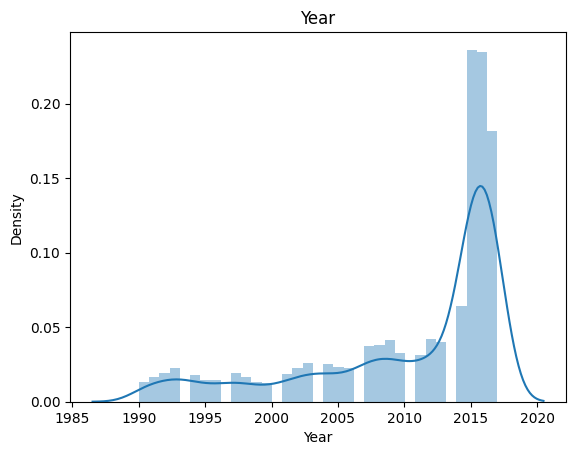

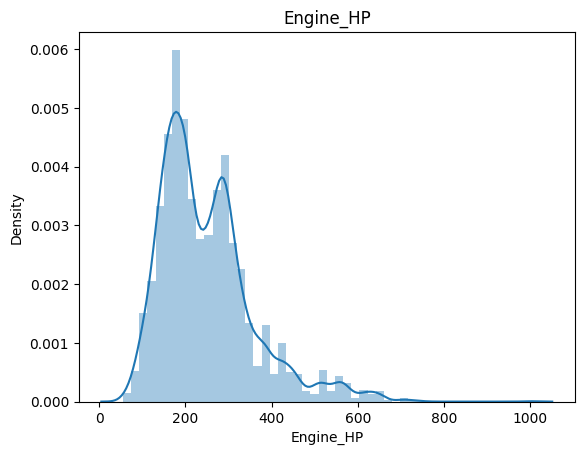

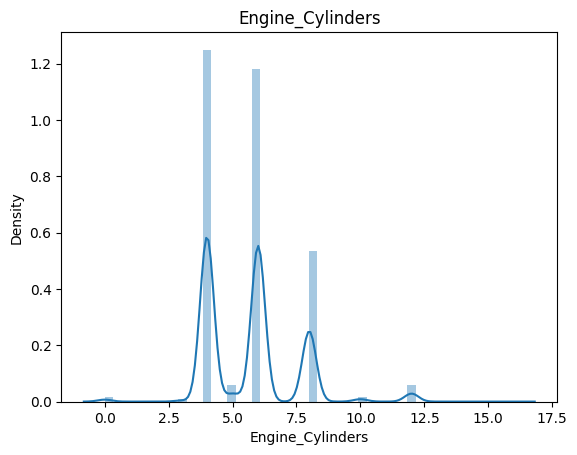

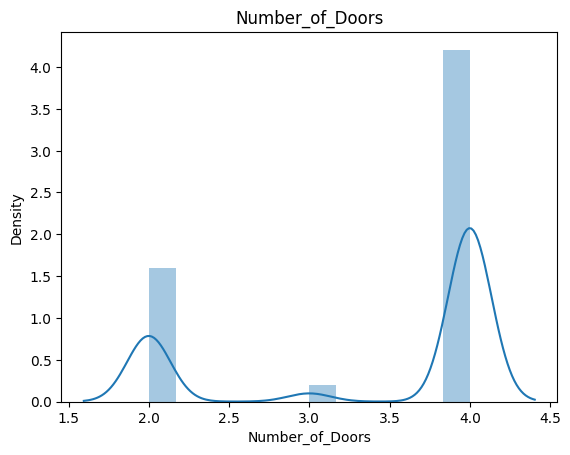

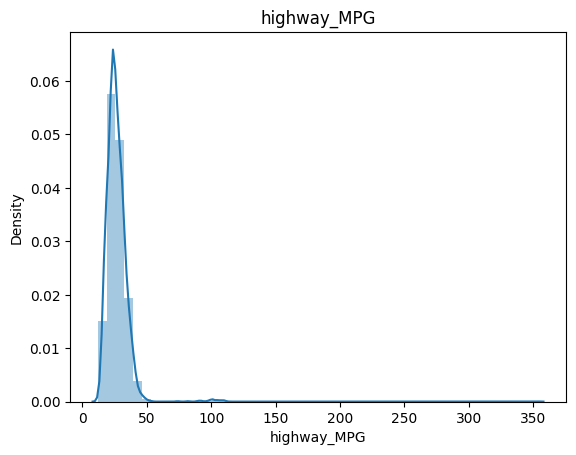

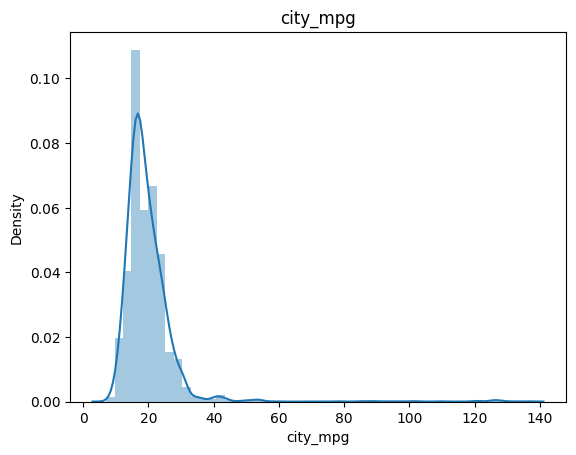

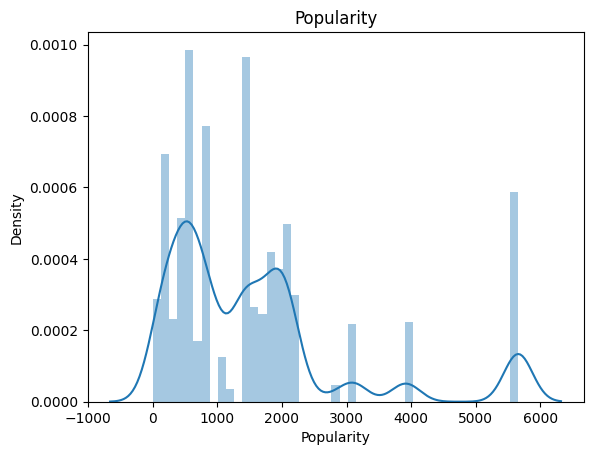

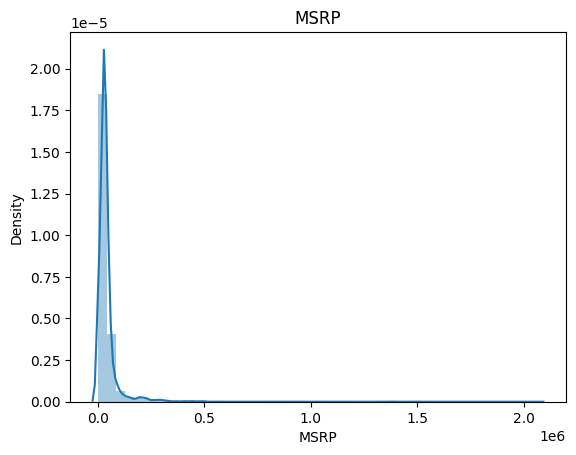

In [17]:
num_cols=["Year","Engine_HP","Engine_Cylinders","Number_of_Doors", "highway_MPG","city_mpg","Popularity","MSRP"]
for i in num_cols:
    plt.figure()
    sns.distplot(df[i])
    plt.title(i)

In [18]:
### Checking for null values
df.isna().sum()

Make                    0
Model                   0
Year                    0
Engine_Fuel_Type        3
Engine_HP              69
Engine_Cylinders       30
Transmission_Type       0
Driven_Wheels           0
Number_of_Doors         6
Market_Category      3742
Vehicle_Size            0
Vehicle_Style           0
highway_MPG             0
city_mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [19]:
#missing data percentage
total = df.isna().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
percent = percent*100
missing_data = pd.concat([total, percent], axis=1, keys=['Total','percent'])
missing_data.head(20)

,Total,percent
Market_Category,3742,31.408427
Engine_HP,69,0.579151
Engine_Cylinders,30,0.251805
Number_of_Doors,6,0.050361
Engine_Fuel_Type,3,0.025180
Make,0,0.000000
Model,0,0.000000
Year,0,0.000000
Transmission_Type,0,0.000000
Driven_Wheels,0,0.000000


In [20]:
# df.dropna(axis=0,inplace=True)

In [21]:
#Checking for duplicate rows
duplicateRows = df[df.duplicated()]
duplicateRows

,Make,Model,Year,Engine_Fuel_Type,Engine_HP,Engine_Cylinders,Transmission_Type,Driven_Wheels,Number_of_Doors,Market_Category,Vehicle_Size,Vehicle_Style,highway_MPG,city_mpg,Popularity,MSRP
14,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,19,3916,31500
18,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,17,3105,2000
20,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,17,3105,2000
24,Audi,100,1993,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,17,3105,2000
25,Audi,100,1993,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,17,3105,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11481,Suzuki,X-90,1998,regular unleaded,95.0,4.0,MANUAL,four wheel drive,2.0,NaN,Compact,2dr SUV,26,22,481,2000
11603,Volvo,XC60,2017,regular unleaded,302.0,4.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Luxury,Performance",Midsize,4dr SUV,29,20,870,46350
11604,Volvo,XC60,2017,regular unleaded,240.0,4.0,AUTOMATIC,front wheel drive,4.0,"Crossover,Luxury",Midsize,4dr SUV,30,23,870,40950
11708,Suzuki,XL7,2008,regular unleaded,252.0,6.0,AUTOMATIC,all wheel drive,4.0,Crossover,Midsize,4dr SUV,22,15,481,29149


In [22]:
data = df[['Make','Year','Model','Engine_Fuel_Type','Engine_HP','Engine_Cylinders','highway_MPG','city_mpg','MSRP']]
data.head()

,Make,Year,Model,Engine_Fuel_Type,Engine_HP,Engine_Cylinders,highway_MPG,city_mpg,MSRP
0,BMW,2011,1 Series M,premium unleaded (required),335.0,6.0,26,19,46135
1,BMW,2011,1 Series,premium unleaded (required),300.0,6.0,28,19,40650
2,BMW,2011,1 Series,premium unleaded (required),300.0,6.0,28,20,36350
3,BMW,2011,1 Series,premium unleaded (required),230.0,6.0,28,18,29450
4,BMW,2011,1 Series,premium unleaded (required),230.0,6.0,28,18,34500


## Outlier detection

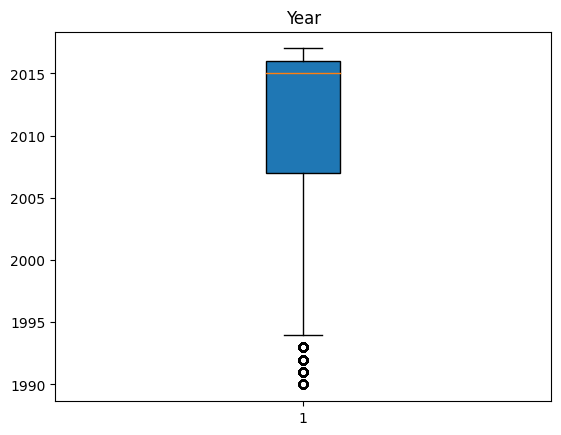

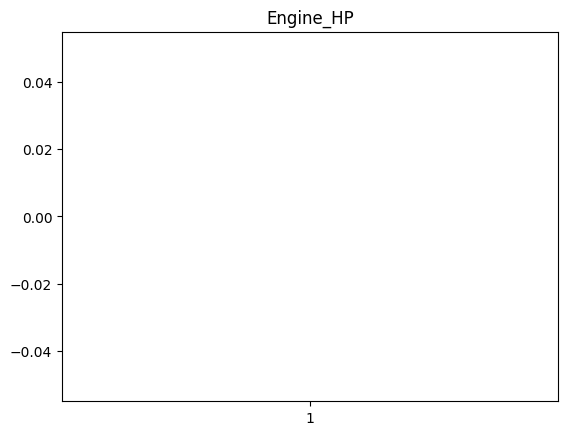

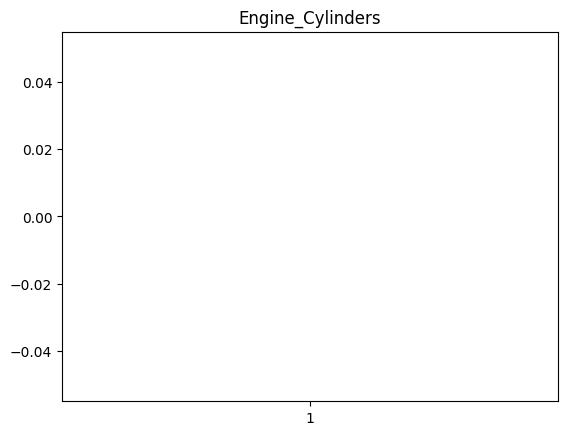

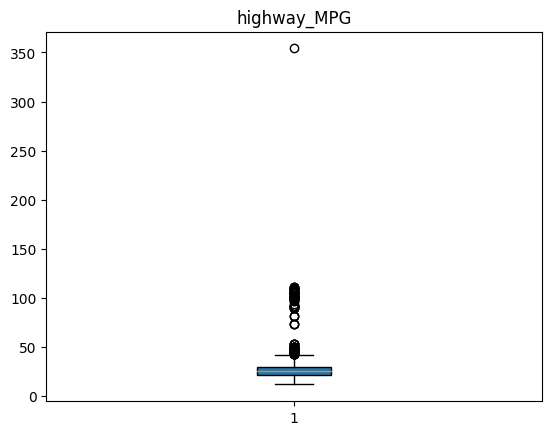

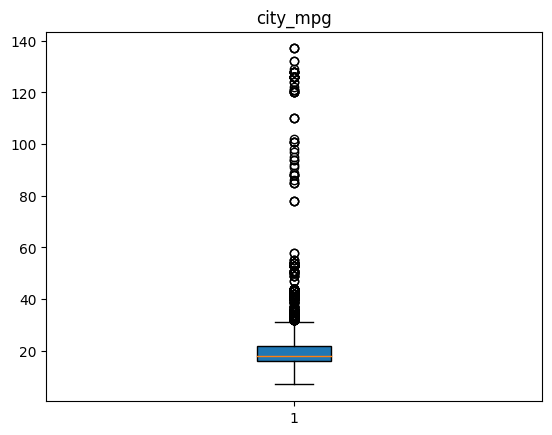

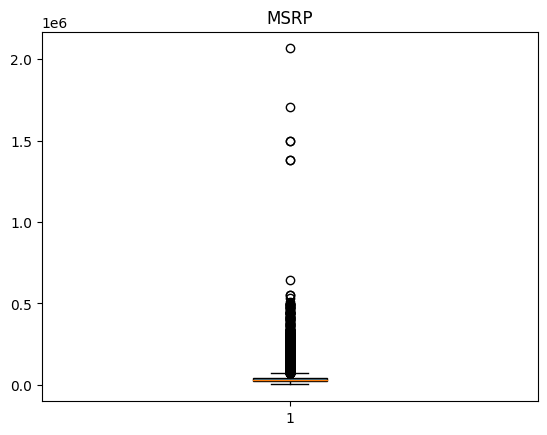

In [23]:
# OUTLIER HANDLING
# # Independent Variable (Numerical)
# #train data
num_cols = ["Year","Engine_HP","Engine_Cylinders","highway_MPG","city_mpg","MSRP"]
for i in num_cols:
    plt.figure()
    plt.boxplot(data[i],patch_artist=True)
    plt.title(i)

# DATA-PREPROCESSING

# Data Cleaning

1.Null value Removal

In [24]:
data.dropna(axis=0,inplace=True)

In [25]:
data.isna().sum()

Make                0
Year                0
Model               0
Engine_Fuel_Type    0
Engine_HP           0
Engine_Cylinders    0
highway_MPG         0
city_mpg            0
MSRP                0
dtype: int64

2.Remove duplicated rows

In [26]:
data.drop_duplicates(keep=False)

,Make,Year,Model,Engine_Fuel_Type,Engine_HP,Engine_Cylinders,highway_MPG,city_mpg,MSRP
0,BMW,2011,1 Series M,premium unleaded (required),335.0,6.0,26,19,46135
1,BMW,2011,1 Series,premium unleaded (required),300.0,6.0,28,19,40650
2,BMW,2011,1 Series,premium unleaded (required),300.0,6.0,28,20,36350
3,BMW,2011,1 Series,premium unleaded (required),230.0,6.0,28,18,29450
4,BMW,2011,1 Series,premium unleaded (required),230.0,6.0,28,18,34500
...,...,...,...,...,...,...,...,...,...
11909,Acura,2012,ZDX,premium unleaded (required),300.0,6.0,23,16,46120
11910,Acura,2012,ZDX,premium unleaded (required),300.0,6.0,23,16,56670
11911,Acura,2012,ZDX,premium unleaded (required),300.0,6.0,23,16,50620
11912,Acura,2013,ZDX,premium unleaded (recommended),300.0,6.0,23,16,50920


3. Outlier Handling

<function matplotlib.pyplot.show(close=None, block=None)>

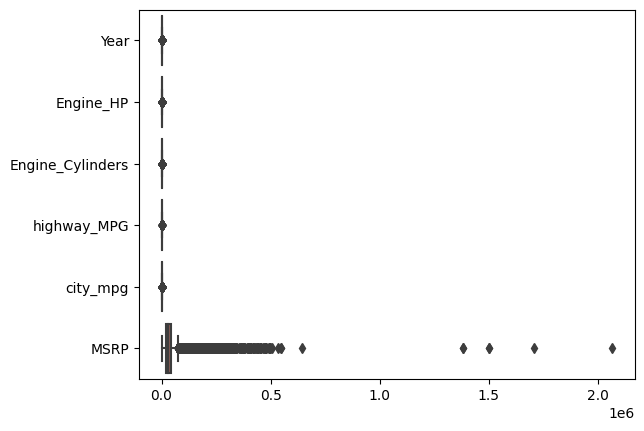

In [27]:
sns.boxplot(data=data,orient='h')
plt.show

In [34]:
out=num_cols
ind1,ind2,i1,i2=[],[],[],[]

for i in out:
    print('Handling Outliers in',i.upper(),'COLUMN: \n')
    Q1=np.percentile(data[i],25,interpolation='midpoint')
    Q2=np.percentile(data[i],50,interpolation='midpoint')
    Q3=np.percentile(data[i],75,interpolation='midpoint')

    IQR = Q3-Q1
    low_lim = Q1-1.5*IQR
    up_lim = Q3+1.5*IQR
    
    print('The values below',low_lim,'and above',up_lim,'are outliers.')
    
    outlier=[]
    for x in data[i]:
        if x > up_lim or x < low_lim:
            outlier.append(x)
            
    print('There are',len(outlier),'outliers in',i,'column.')
            
    ind1,ind2=data[i] > up_lim, data[i]
    i1=data.loc[ind1].index
    
    data.drop(i1,inplace=True)
    
    print('Shape of dataset after removal of outliers in',i.upper(),'column:',data.shape,'\n\n')


Handling Outliers in YEAR COLUMN: 

The values below 1988.5 and above 2032.5 are outliers.
There are 0 outliers in Year column.
Shape of dataset after removal of outliers in YEAR column: (10230, 9) 


Handling Outliers in ENGINE_HP COLUMN: 

The values below -2.0 and above 454.0 are outliers.
There are 0 outliers in Engine_HP column.
Shape of dataset after removal of outliers in ENGINE_HP column: (10230, 9) 


Handling Outliers in ENGINE_CYLINDERS COLUMN: 

The values below 1.0 and above 9.0 are outliers.
There are 0 outliers in Engine_Cylinders column.
Shape of dataset after removal of outliers in ENGINE_CYLINDERS column: (10230, 9) 


Handling Outliers in HIGHWAY_MPG COLUMN: 

The values below 10.0 and above 42.0 are outliers.
There are 0 outliers in highway_MPG column.
Shape of dataset after removal of outliers in HIGHWAY_MPG column: (10230, 9) 


Handling Outliers in CITY_MPG COLUMN: 

The values below 7.0 and above 31.0 are outliers.
There are 0 outliers in city_mpg column.
Shape 

## Encoding

In [35]:
# encode categorical columns into numeric labels(lABEL eNCODING)
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
columns = ["Make","Model","Engine_Fuel_Type"]

for col in columns:
    le.fit(data[col])
    data[col] = le.transform(data[col])
    
data.head()

,Make,Year,Model,Engine_Fuel_Type,Engine_HP,Engine_Cylinders,highway_MPG,city_mpg,MSRP
0,3,2011,3,6,335.0,6.0,26,19,46135
1,3,2011,2,6,300.0,6.0,28,19,40650
2,3,2011,2,6,300.0,6.0,28,20,36350
3,3,2011,2,6,230.0,6.0,28,18,29450
4,3,2011,2,6,230.0,6.0,28,18,34500


### Seperating features and target label

In [36]:
X = data[['Make','Year','Model','Engine_Fuel_Type','Engine_HP','Engine_Cylinders','highway_MPG','city_mpg']]
y = data['MSRP']

In [37]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

In [38]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size = 0.2,random_state =42)

# Modelling

# Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report , confusion_matrix, mean_squared_error, r2_score,mean_absolute_error
LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)


x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.09579667644183773
              precision    recall  f1-score   support

        2000       0.20      0.96      0.33       205
        2027       0.00      0.00      0.00         1
        2041       0.00      0.00      0.00         1
        2045       0.00      0.00      0.00         1
        2060       0.00      0.00      0.00         1
        2063       0.00      0.00      0.00         1
        2066       0.00      0.00      0.00         1
        2073       0.00      0.00      0.00         1
        2078       0.00      0.00      0.00         1
        2079       0.00      0.00      0.00         2
        2080       0.00      0.00      0.00         1
        2081       0.00      0.00      0.00         1
        2083       0.00      0.00      0.00         1
        2091       0.00      0.00      0.00         1
        2093       0.00      0.00      0.00         1
        2098       0.00      0.00      0.00         1
        2100       0.00  

In [40]:
y_pred =LogReg.predict(Xtest)
y_pred
print('MSE =',mean_squared_error(Ytest,y_pred))
print('MAE =',mean_absolute_error(Ytest,y_pred))
print('R2 Score =',r2_score(Ytest,y_pred))

MSE = 239407492.11485827
MAE = 11777.567448680353
R2 Score = -0.048755895338092436


In [41]:
# # Cross validation score (Logistic Regression)
# from sklearn.model_selection import cross_val_score
# score = cross_val_score(LogReg,X,y,cv=5)
# score

In [42]:
# np.mean(score)

# Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.1402737047898338
              precision    recall  f1-score   support

        2000       0.89      0.98      0.93       205
        2008       0.00      0.00      0.00         0
        2027       0.00      0.00      0.00         1
        2034       0.00      0.00      0.00         0
        2041       0.00      0.00      0.00         1
        2045       0.00      0.00      0.00         1
        2060       0.00      0.00      0.00         1
        2063       0.00      0.00      0.00         1
        2066       0.00      0.00      0.00         1
        2073       0.00      0.00      0.00         1
        2078       0.00      0.00      0.00         1
        2079       0.00      0.00      0.00         2
        2080       0.00      0.00      0.00         1
        2081       1.00      1.00      1.00         1
        2083       0.00      0.00      0.00         1
        2084       0.00      0.00      0.00         0
        2091       0.00      0.00      0.00

In [44]:
y_pred =RF.predict(Xtest)
y_pred
print('MSE =',mean_squared_error(Ytest,y_pred))
print('MAE =',mean_absolute_error(Ytest,y_pred))
print('R2 Score =',r2_score(Ytest,y_pred))

MSE = 17973055.572336268
MAE = 2777.514662756598
R2 Score = 0.9212666745630348


In [45]:
# # Cross validation score (Random Forest)
# score = cross_val_score(RF,X,y,cv=5)
# score

# Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  10.166177908113392
              precision    recall  f1-score   support

        2000       0.51      0.98      0.67       205
        2027       0.00      0.00      0.00         1
        2041       0.00      0.00      0.00         1
        2045       0.00      0.00      0.00         1
        2060       0.00      0.00      0.00         1
        2063       0.00      0.00      0.00         1
        2066       0.00      0.00      0.00         1
        2073       0.00      0.00      0.00         1
        2078       0.00      0.00      0.00         1
        2079       0.00      0.00      0.00         2
        2080       0.00      0.00      0.00         1
        2081       0.00      0.00      0.00         1
        2083       0.00      0.00      0.00         1
        2091       0.00      0.00      0.00         1
        2093       0.00      0.00      0.00         1
        2098       0.00      0.00      0.00         1
        2100       0.00      0.0

In [47]:
y_pred =DecisionTree.predict(Xtest)
y_pred
print('MSE =',mean_squared_error(Ytest,y_pred))
print('MAE =',mean_absolute_error(Ytest,y_pred))
print('R2 Score =',r2_score(Ytest,y_pred))

MSE = 117988884.49560118
MAE = 6987.601173020528
R2 Score = 0.4831342281478782


In [48]:
# # Cross validation score (Random Forest)
# score = cross_val_score(DecisionTree ,X,=y,cv=5)
# score

# KNN

In [49]:
from sklearn.neighbors import KNeighborsClassifier
#KNN Regressor
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=12)
knn.fit(Xtrain, Ytrain)
y_pred_knn = knn.predict(Xtest)

In [50]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
print('Mean Squared Error =',mean_squared_error(Ytest,y_pred_knn))
print('Mean absolute Error =',mean_absolute_error(Ytest,y_pred_knn))
print('R2 Score =',r2_score(Ytest,y_pred_knn))

Mean Squared Error = 32309866.072733384
Mean absolute Error = 3649.762096774194
R2 Score = 0.8584623972206075


#### comparing all these models Random Forest have an R2 score more than 0.92 which is a good model

In [51]:
import numpy as np
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [52]:
from sklearn.model_selection import RandomizedSearchCV

In [53]:
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [59]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [60]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor()

In [61]:
#  Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [62]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [63]:
rf_random.fit(Xtrain,Ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  10.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  10.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   9.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  11.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  10.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  16.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  15.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [64]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [65]:
rf_random.best_score_

-11085194.313368589

In [68]:
from sklearn import metrics
predictions=rf_random.predict(Xtest)
print('MAE:', metrics.mean_absolute_error(Ytest, predictions))
print('MSE:', metrics.mean_squared_error(Ytest, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Ytest, predictions)))
print('R2 Score =',r2_score(Ytest,predictions))

MAE: 2180.296240421212
MSE: 10099861.003722666
RMSE: 3178.027848166637
R2 Score = 0.9557562352114374


In [69]:
# SAMPLE PREDICTION

In [71]:
##sample prediction
Make = input('enter Car make:')

Year = input('enter Year:')
Model = input('enter Model:')
Engine_Fuel_Type= input('enter Engine_Fuel_Type:')
Engine_HP = input('enter Engine_HP:')
Engine_Cylinders =input('enter Engine_Cylinders:')
highway_MPG =input('enter highway_MPG:')
city_mpg = input('enter city_mpg:')
out_1 = rf_random.predict([[
       float(Make),
       float(Year),
       float(Model),
       float(Engine_Fuel_Type),
       float(Engine_HP),
       float(Engine_Cylinders),
       float(highway_MPG),
       float(city_mpg)]])
print('Price of car:',out_1)

enter Car make:5
enter Year:2023
enter Model:6
enter Engine_Fuel_Type:3
enter Engine_HP:300
enter Engine_Cylinders:3
enter highway_MPG:20
enter city_mpg:19
Price of car: [44442.11769175]
